In [4]:
##### Koch_alpha @ YYE
##### April 2023
### Generate Koch triangle with arbitraty angles

import numpy as np
import matplotlib.pyplot as plt
import math, random

This file is only for generation of Koch-like figures, as well as the related aminations.

Here, we'd like to modifiy the angle value $\alpha$, not necessarily equal to $\pi/3$. We write these equations:
$$ d^2 = \ell^2 + \ell^2 - 2\ell^2\cos\alpha $$
$$ d = \ell \sqrt{2(1-\cos\alpha)} $$
$$ d+2\ell = L $$
and solving:
$$ \frac{L}{\ell} = \sqrt{2(1-\cos\alpha)} + 2 $$
$$ d = \frac{\sqrt{2(1-\cos\alpha)}}{\sqrt{2(1-\cos\alpha)} + 2} $$
Note that $L$ refers to ``l``, $\ell$ refers to ``segm``, and $d$ refers to ``dist``.

In [2]:
def koch_line(start, end, alpha, direction):
    """
    Segments a line to Koch line, creating fractals.
    :param tuple start:  (x, y) coordinates of the starting point
    :param tuple end: (x, y) coordinates of the end point
    :alpha: angle for Koch triangle (unit: rad)
    :direction: 凹凸 convex or not?
    ~returns tuple: tuple of three points between the segmentation
    """
    
    # coordinates of the start
    x1, y1 = start[0], start[1]
    # coordinates of the end
    x2, y2 = end[0], end[1]
    
    # the length of the line
    deltax, deltay = x2 - x1, y2 - y1
    l = np.sqrt((deltax)**2 + (deltay)**2)
    coef = np.sqrt( 2 * (1 - np.cos(alpha)) ) + 2
    segm = l / (coef)
    #dist = segm * coef
    beta = (np.pi - alpha)/2
    if x1==x2:
        if y1<y2:
            theta = +np.pi / 2
        if y1>y2:
            theta = -np.pi / 2
    else:
        theta = np.arctan((deltay)/(deltax))
    if x1>x2:
        theta += np.pi
    
    changex, changey = (deltax)/(coef), (deltay)/(coef)
    # second point: one third in each direction from the first point
    b = (x1+changex, y1+changey)
    # third point: rotation for multiple of 60 degrees
    degree = theta + beta * direction
    c = (b[0] + segm * np.cos(degree), b[1] + segm * np.sin(degree))
    # fourth point: two thirds in each direction from the first point
    d = (x2-changex, y2-changey)
    
    return [b, c, d]

CPU times: user 877 ms, sys: 38 ms, total: 915 ms
Wall time: 922 ms


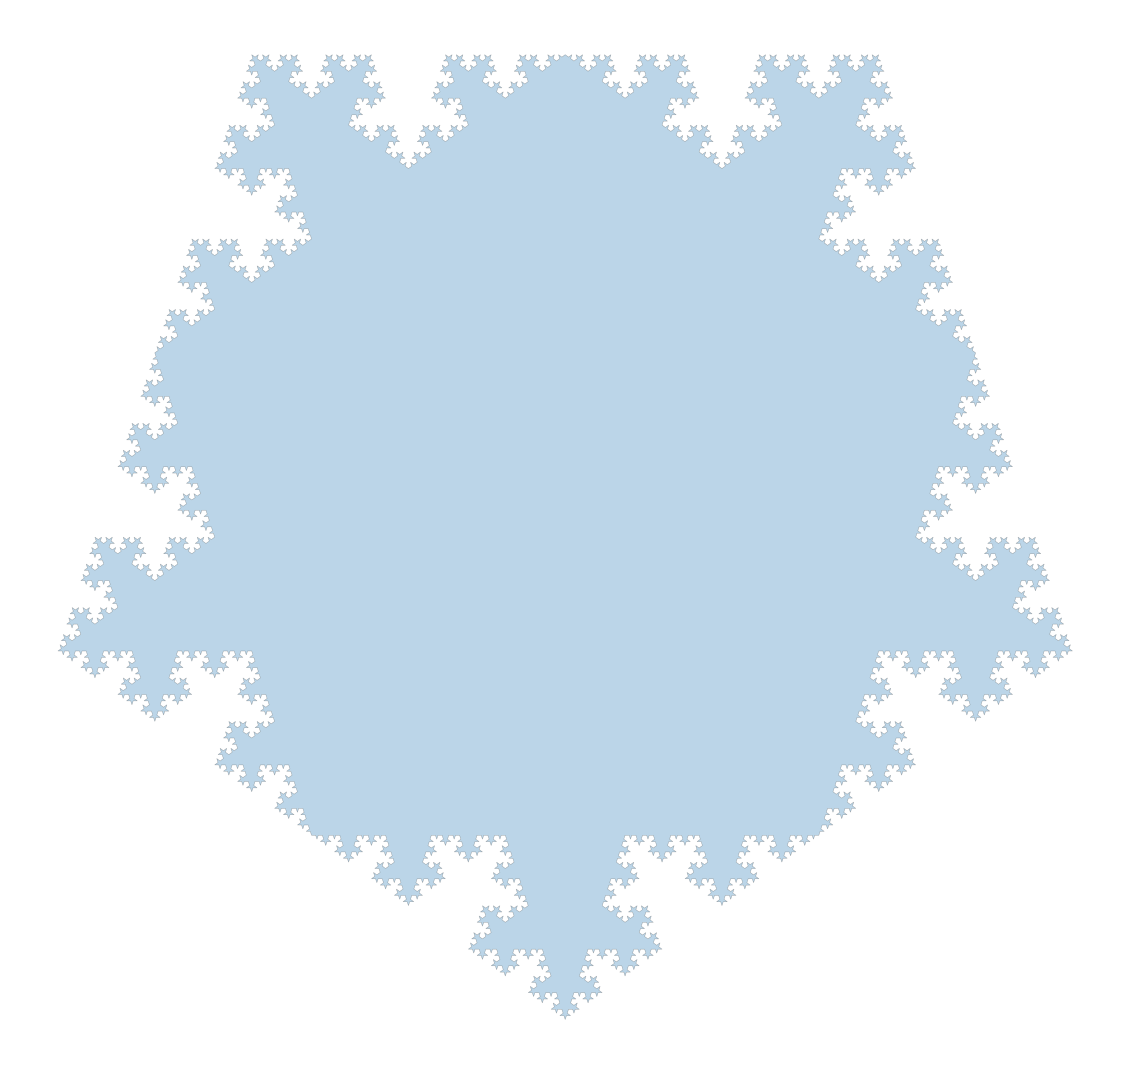

In [3]:
%%time
## General initial coordinates
initial_shape = 5 # 3 = triangle, 4 = square, 5 = star, etc.
edge_length = 25 # Initial edge length
angle_ini = 2.0 * np.pi / initial_shape
coordinate = []
new_x, new_y = 0, 0

for i in range(initial_shape):
    coordinate.append((new_x,new_y))
    new_x += edge_length * np.cos(i * angle_ini)
    new_y += edge_length * np.sin(i * angle_ini)
    
## To form a circle.
coordinate.append(coordinate[0])    
#print(coordinate)





max_degree = 5 ## Define the recursion order
alpha_ratio = 5
degre = np.pi/ alpha_ratio ## Define the fractal angle
direction = - 1  ## Define 凹(concave +1) 凸(convex -1)
for i in range(max_degree): ## Recursion Order
    num_edge = len(coordinate)
    for j in range(num_edge-1): ## How many times to insert new points?
        num_point = j * 4
        coordinate = coordinate[:num_point+1] + koch_line(coordinate[num_point],coordinate[num_point+1],degre,direction) + coordinate[num_point+1:]
        


     
    
# Extract all coordinates
pos_x = []
pos_y = []
for i in range(len(coordinate)):
    pos_x.append(coordinate[i][0])
    pos_y.append(coordinate[i][1])

# fill the polygons
plt.figure(figsize=(20, 20))
plt.fill(pos_x, pos_y, edgecolor='black', lw=0.5, alpha = 0.3)
plt.axis('off')
plt.axis('scaled')
plt.show

## chr(48~57) = 0~9 // + 48
if direction == +1:
    chr_direction = chr(43)
if direction == -1:
    chr_direction = chr(45)
## Name as: initial polygon + alpha angle + concave/convex + recursion degree. 
filename = 'Koch_'+chr(initial_shape+48)+'_π;'+chr(alpha_ratio+48)+chr_direction+chr(max_degree+48)
plt.savefig(filename, dpi=200)

Then we try do generate gif.